In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import timeit

In [2]:
csv_es = pd.read_csv("/home/guti/Documents/UPM_Software_3/Big_Data/final_project/data/trends/trends_es_daily.csv")
csv_es

,day,covid,pcr,fiebre,perdida_olfato,antigenos
0,2021-11-28,29,33,30,23,9
1,2021-11-29,43,38,33,34,13
2,2021-11-30,44,34,35,14,14
3,2021-12-01,43,31,41,13,14
4,2021-12-02,49,31,37,0,15
...,...,...,...,...,...,...
62,2022-01-29,27,17,54,0,16
63,2022-01-30,22,12,47,25,13
64,2022-01-31,27,17,46,51,15
65,2022-02-01,26,17,41,20,15


In [3]:
csv_eeuu = pd.read_csv("/home/guti/Documents/UPM_Software_3/Big_Data/final_project/data/trends/trends_us_daily.csv")
csv_eeuu

,day,covid,pcr,fever,no_smell
0,2021-11-28,28,25,48,51
1,2021-11-29,32,30,45,75
2,2021-11-30,33,30,47,51
3,2021-12-01,31,31,50,51
4,2021-12-02,31,33,50,52
...,...,...,...,...,...
62,2022-01-29,26,23,50,56
63,2022-01-30,23,20,58,45
64,2022-01-31,30,29,58,53
65,2022-02-01,27,26,48,41


In [4]:
casos_es = pd.read_csv("/home/guti/Documents/UPM_Software_3/Big_Data/final_project/data/covid_aggregated.csv")
casos_es

,fecha,sum(num_casos),sum(num_hosp),sum(num_uci),sum(num_def)
0,2020-01-01,0.0,8.0,0.0,0.0
1,2020-01-02,0.0,74.0,1.0,0.0
2,2020-01-03,0.0,8.0,1.0,0.0
3,2020-01-04,0.0,6.0,0.0,0.0
4,2020-01-05,0.0,7.0,0.0,0.0
...,...,...,...,...,...
812,2022-03-23,23132.0,410.0,19.0,49.0
813,2022-03-24,19030.0,385.0,23.0,48.0
814,2022-03-25,17474.0,350.0,15.0,46.0
815,2022-03-26,8415.0,295.0,12.0,39.0


In [5]:
casos_es.dtypes

fecha              object
sum(num_casos)    float64
sum(num_hosp)     float64
sum(num_uci)      float64
sum(num_def)      float64
dtype: object

In [6]:
casos_es.fecha = pd.to_datetime(casos_es.fecha)

In [7]:
casos_es.dtypes

fecha             datetime64[ns]
sum(num_casos)           float64
sum(num_hosp)            float64
sum(num_uci)             float64
sum(num_def)             float64
dtype: object

In [8]:
casos_es = casos_es.set_index(['fecha'])

In [9]:
casos_es['sum(num_casos)'] = casos_es['sum(num_casos)'].apply(lambda l: int (l))

In [10]:
casos_es['sum(num_hosp)'] = casos_es['sum(num_hosp)'].apply(lambda l: int (l))

In [11]:
casos_es['sum(num_uci)'] = casos_es['sum(num_uci)'].apply(lambda l: int (l))

In [12]:
casos_es['sum(num_def)'] = casos_es['sum(num_def)'].apply(lambda l: int (l))

In [13]:
casos_es.dtypes

sum(num_casos)    int64
sum(num_hosp)     int64
sum(num_uci)      int64
sum(num_def)      int64
dtype: object

In [14]:
casos_es_novfeb = casos_es.loc["2021-11-28":"2022-2-2"]
casos_es_novfeb

,sum(num_casos),sum(num_hosp),sum(num_uci),sum(num_def)
fecha,,,,
2021-11-28,4537,267,36,27
2021-11-29,11555,353,54,41
2021-11-30,13309,425,38,45
2021-12-01,14369,398,60,41
2021-12-02,15618,395,53,36
...,...,...,...,...
2022-01-29,47035,1019,58,246
2022-01-30,39935,943,68,232
2022-01-31,80735,1126,80,266


In [15]:
casos_es = casos_es.resample('1W').sum()
casos_es

,sum(num_casos),sum(num_hosp),sum(num_uci),sum(num_def)
fecha,,,,
2020-01-05,0,103,2,0
2020-01-12,2,43,2,0
2020-01-19,1,47,3,0
2020-01-26,1,56,2,0
2020-02-02,1,86,1,0
...,...,...,...,...
2022-02-27,117910,2610,156,657
2022-03-06,111225,2296,120,520
2022-03-13,110548,2266,149,436


In [16]:
casos_es.to_csv("/home/guti/Documents/UPM_Software_3/Big_Data/final_project/data/casos_es_semanal.csv")

In [17]:
trends_es_daily = csv_es

In [18]:
trends_es_daily.day = pd.to_datetime(trends_es_daily.day)
trends_es_daily = trends_es_daily.set_index(['day'])


In [19]:
trends_es_daily

,covid,pcr,fiebre,perdida_olfato,antigenos
day,,,,,
2021-11-28,29,33,30,23,9
2021-11-29,43,38,33,34,13
2021-11-30,44,34,35,14,14
2021-12-01,43,31,41,13,14
2021-12-02,49,31,37,0,15
...,...,...,...,...,...
2022-01-29,27,17,54,0,16
2022-01-30,22,12,47,25,13
2022-01-31,27,17,46,51,15


In [20]:
casos_es_novfeb.index.names = ["day"]
casos_es_novfeb

,sum(num_casos),sum(num_hosp),sum(num_uci),sum(num_def)
day,,,,
2021-11-28,4537,267,36,27
2021-11-29,11555,353,54,41
2021-11-30,13309,425,38,45
2021-12-01,14369,398,60,41
2021-12-02,15618,395,53,36
...,...,...,...,...
2022-01-29,47035,1019,58,246
2022-01-30,39935,943,68,232
2022-01-31,80735,1126,80,266


In [21]:
casos_es_novfeb['sum(num_casos)'].corr(trends_es_daily.covid)
casos_es_novfeb['sum(num_casos)'].corr(trends_es_daily.pcr)
casos_es_novfeb['sum(num_casos)'].corr(trends_es_daily.fiebre)
casos_es_novfeb['sum(num_casos)'].corr(trends_es_daily.perdida_olfato)
casos_es_novfeb['sum(num_casos)'].corr(trends_es_daily.antigenos)

0.4380065507706367

In [22]:
head = ['co_covid', 'co_fibre','pcr','perdida_olfato','antigenos']

In [23]:
covid = []
fiebre = []
pcr = []
olfato = []
antigenos = []
corr = {
     'covid':[],
     'pcr':[],
     'fiebre':[],
     'perdida_olfato':[] ,
     'antigenos':[]
}

In [24]:
# avanza la columna i posiciones con respecto al indice
def shift_column(df, col_n, i):
    df_col = df[col_n]
    shifted_index = df_col.index[:-i] if i!=0 else df_col.index
    shifted_col = df_col[i:]
    shifted_col.index = shifted_index
    return shifted_col
        

In [25]:
df_t = trends_es_daily.copy()

In [26]:
for i in range(0,50):
    for col_name in trends_es_daily.columns:
        trend_col = trends_es_daily[col_name][:-i] if i!=0 else trends_es_daily[col_name]
        corr[col_name].append(shift_column(casos_es_novfeb, 'sum(num_casos)', i).corr(trend_col))

In [27]:
'obama'[:1000]

'obama'

In [28]:
covid

[]

In [29]:
trends_es_daily.columns

Index(['covid', 'pcr', 'fiebre', 'perdida_olfato', 'antigenos'], dtype='object')

In [30]:
for i in trends_es_daily.columns:
    print(type(i))

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


In [31]:
corr_df = pd.DataFrame(corr)

In [38]:
corr_df.index.names = ['desfase']

In [39]:
import seaborn as sns
sns.set_theme(style="darkgrid")
%matplotlib inline
#%matplotlib inline

[Text(0.5, 1.0, 'Correlación con casos_covid')]

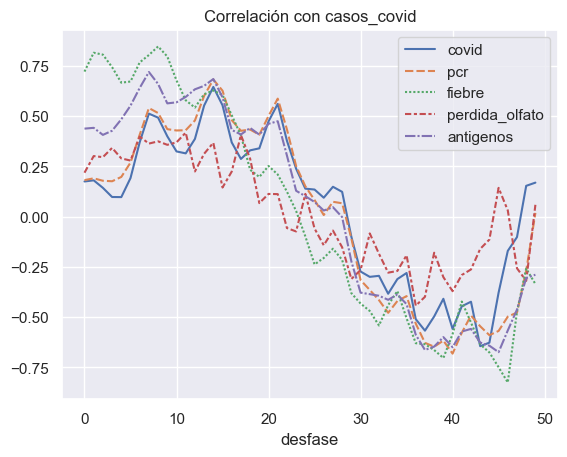

In [40]:
# Plot the responses for different events and regions
sns.lineplot(data=corr_df,).set(title='Correlación con casos_covid')


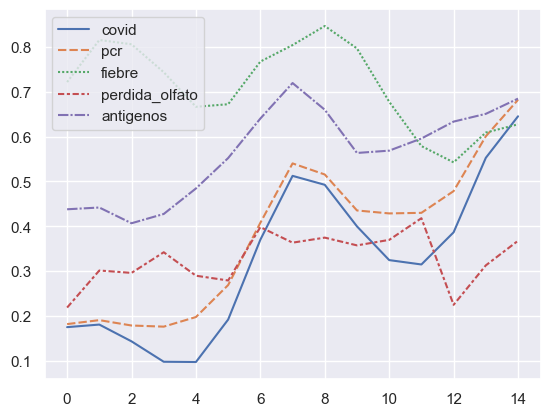

CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 6.2 µs


In [35]:
sns.lineplot(data=corr_df.iloc[:15,])
plt.show()
%time

In [36]:
%matplotlib

Using matplotlib backend: <object object at 0x7fbff77f5a20>


In [37]:
plt.show()